# Communicate a data set

**project for Udacity Nanodegree by Léon de Jong**

Investigating the Prosper Load dataset.

In [1]:
#import necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams
%matplotlib inline
%config Completer.use_jedi = False
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df_loan = pd.read_csv('prosperLoanData.csv')

## Inital investigation of Dataset

In [3]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
print(df_loan.shape)
print(df_loan.dtypes)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


Initialy there are 113937 rows, which each row representing a listing on the prosper website for a loan. Each listing has a maximum of 81 variables attached. Not all variables are available, as some are associated with previous loans or other information that might not be available. As 81 variables are to much for intial analysis, a series of variables are selected from the variable definition list. 

In [5]:
#selection of variables for further analysis
voi = ['ListingKey','ListingCreationDate','Term','LoanStatus','BorrowerAPR','BorrowerRate','LenderYield','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)','ProsperRating (Alpha)','ProsperScore','ListingCategory (numeric)','CurrentlyInGroup','GroupKey','CreditScoreRangeLower','CreditScoreRangeUpper','AmountDelinquent','DebtToIncomeRatio','IncomeVerifiable','StatedMonthlyIncome','LoanKey','TotalProsperLoans','MonthlyLoanPayment']

In [6]:
# copied dataset with selection of variables for further wrangling and 
df_loan_filtered = df_loan[voi]
df_loan_filtered.head()

,ListingKey,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,...,GroupKey,CreditScoreRangeLower,CreditScoreRangeUpper,AmountDelinquent,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,MonthlyLoanPayment
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,NaN,...,NaN,640.0,659.0,472.0,0.17,True,3083.333333,E33A3400205839220442E84,NaN,330.43
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,...,NaN,680.0,699.0,0.0,0.18,True,6125.000000,9E3B37071505919926B1D82,NaN,318.93
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,NaN,...,783C3371218786870A73D20,480.0,499.0,NaN,0.06,True,2083.333333,6954337960046817851BCB2,NaN,123.32
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,...,NaN,800.0,819.0,10056.0,0.15,True,2875.000000,A0393664465886295619C51,NaN,321.45
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,...,NaN,680.0,699.0,0.0,0.26,True,9583.333333,A180369302188889200689E,1.0,563.97


Many interesting variables are only applicable for loans originating after 2009, let's filter these out

In [7]:
df_loan_filtered['ListingCreationDate'] = df_loan_filtered['ListingCreationDate'].astype('datetime64')

In [8]:
# select loans from after July 2009
df_loan_filtered = df_loan_filtered[df_loan_filtered['ListingCreationDate']>'2009-08-01']

In [9]:
df_loan_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84672 entries, 1 to 113936
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ListingKey                 84672 non-null  object        
 1   ListingCreationDate        84672 non-null  datetime64[ns]
 2   Term                       84672 non-null  int64         
 3   LoanStatus                 84672 non-null  object        
 4   BorrowerAPR                84672 non-null  float64       
 5   BorrowerRate               84672 non-null  float64       
 6   LenderYield                84672 non-null  float64       
 7   EstimatedEffectiveYield    84672 non-null  float64       
 8   EstimatedLoss              84672 non-null  float64       
 9   EstimatedReturn            84672 non-null  float64       
 10  ProsperRating (numeric)    84672 non-null  float64       
 11  ProsperRating (Alpha)      84672 non-null  object        
 12  Pro

Here we see that the `ProsperRating (Alpha)` is a string variable and should be converted in an ordered categorical type

In [43]:
# convert ProsperRating into ordered categorical types
ordinal_var_dict = {'ProsperRating (Alpha)': ['AA','A','B','C','D','E','HR']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_loan_filtered[var] = df_loan_filtered[var].astype(ordered_var)

The main goal of this analysis is to see what would be good listings to invest in. To that effect there are 2 ratings available. A good investment is determined by the LenderYield attained and the chance of default or delinquency. Let's look at the distribution of LenderYield first

Text(0, 0.5, 'Number of listings')

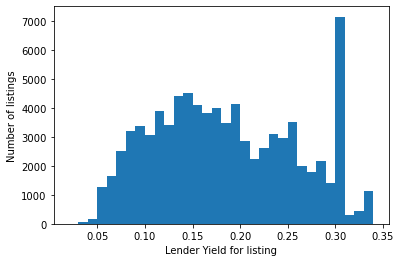

In [10]:
binsize = 0.01
bins = np.arange(df_loan_filtered.LenderYield.min()-binsize, df_loan_filtered.LenderYield.max()+binsize, binsize )
plt.hist(data = df_loan_filtered, x = 'LenderYield', bins = bins)
plt.xlabel('Lender Yield for listing')
plt.ylabel('Number of listings')

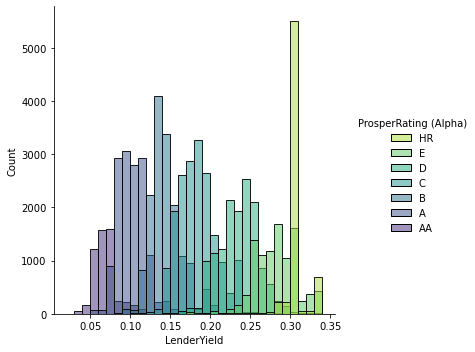

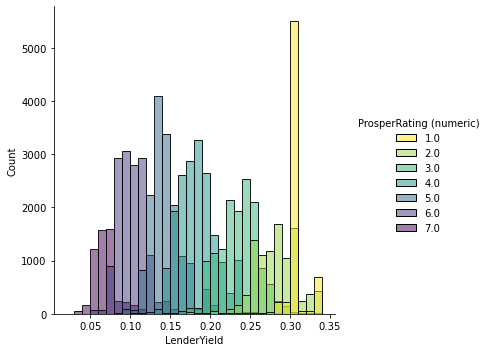

In [50]:
sb.displot(data = df_loan_filtered, x = 'LenderYield', bins = bins, hue= 'ProsperRating (Alpha)', hue_order = reversed(Rating_list), palette= 'viridis_r')
sb.displot(data = df_loan_filtered, x = 'LenderYield', bins = bins, hue= 'ProsperRating (numeric)', hue_order = reversed(Rating_list), palette= 'viridis_r')

Here we see Lender yield looks to be generally normally distributed, with a large spike around 0.3. HR  and 1.0 as a rating stands out, however among high yielding listings there are better ratings available. Before diving further into the options for high yielding listings let's have a closer look at the ratings.

Let's first look at the different scores that are available and their effect on on the LenderYield and BorowerRate

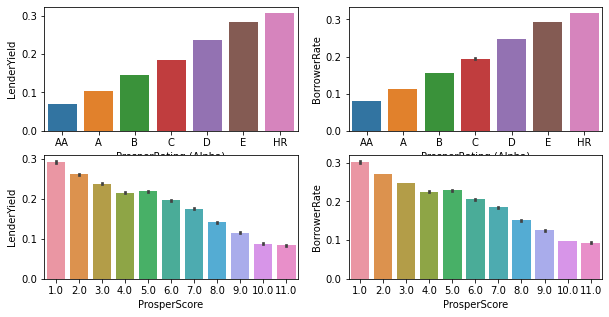

In [48]:
fig, axs = plt.subplots(2,2, figsize = (10,5))
sb.barplot(ax = axs[0,0],data = df_loan_filtered, x = 'ProsperRating (Alpha)', y = 'LenderYield');
sb.barplot(ax = axs[0,1],data = df_loan_filtered, x = 'ProsperRating (Alpha)', y = 'BorrowerRate');
sb.barplot(ax = axs[1,0],data = df_loan_filtered, x = 'ProsperScore', y = 'LenderYield');
sb.barplot(ax = axs[1,1],data = df_loan_filtered, x = 'ProsperScore', y = 'BorrowerRate');

#try this in a stacked bar chart

Based on the above visualisations we see some differences in `LenderYield` and `BorrowerRate` per rating and some interesting behaviour of the same in the `ProsperScore`. The Yield and Borrower rate go up as the rating goes from "good" to "poor". This is as expected. The rise in `LenderYield` and `BorrowerRate` at the `ProsperScore` of 5 is curious. Seeing as the rating systems seem to be good indicators of the Yield and Rate let's take a look at some variables that might influence the rating, as to see which variables can be part of the analysis for a good high yield low risk listing. Obvious variables are
- `AmountDelinquent` 
- `CreditScoreRangeLower`
- `DebtToIncomeRatio` 
- `EstimatedLoss`
- `LoanStatus`
An interesting variable is the Group. According to the prosper API explanation site (https://www.prosper.com/Downloads/Services/Documentation/ProsperAPI_Objects_Details.html), there are user groups that prosper members can belong to. The membership of these groups is said to have an impact on lending rates. Let's check how many groups there are and if there are differences in lending rates. so let's add Group to the list
- `Group`




** difference between lender Yield and Borrower Rate?**
** Prospor Score predictor for  **
** amount delinquent per prosper score** --> doesn't seem to be correlated
** seems to be a difference in slope of correlation between estimated loss and prosper rating between members of groups and non members**
** percentage of loan status per rating ** 
** estimated loss needs to be entered**  DONE
** descriptive statistics per score predictors
Group key is irrelevant as no more information is available, Currently in Group is relevant. Groups are groups of Prosper members around an affiliation or interest. They can recieve better ratings or no.

possible....interest per rating and group member...there are 217 groups, and no more information about each group...so can be deleted

### Rating (Alpha)

Looking at the two different rating systems in use. Let's see if there appears to be a connection to possible numerical indicator values like
- `AmountDelinquent` 
- `CreditScoreRangeLower`
- `DebtToIncomeRatio` \
- `EstmiatedLoss`

<AxesSubplot:xlabel='ProsperRating (Alpha)', ylabel='EstimatedLoss'>

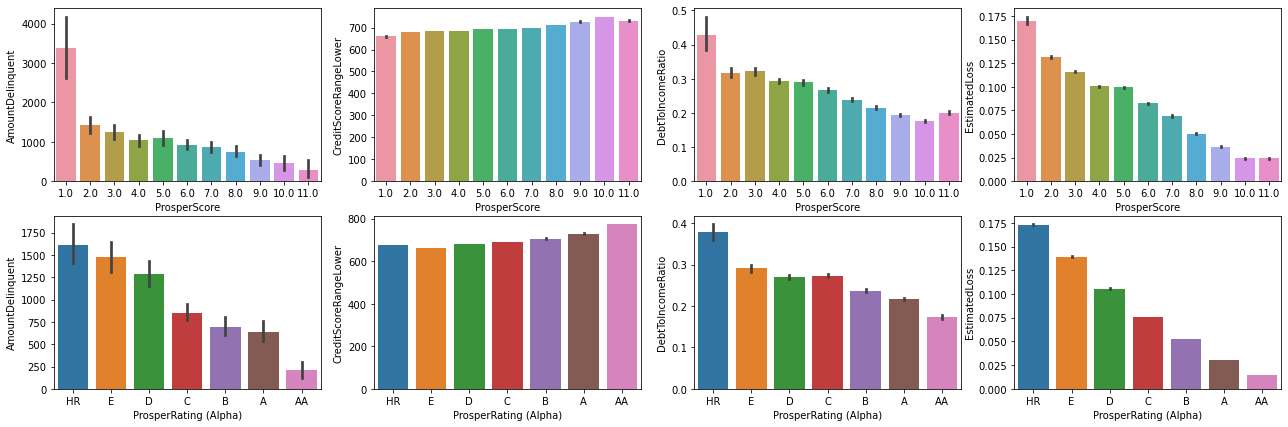

In [53]:
#Reverse rating order in order to keep it in line with prosperscore order
Rating_list = ['AA','A','B','C','D','E','HR']
order = reversed(Rating_list)
fig, axs = plt.subplots(2,4, figsize = (22,7))
sb.barplot(ax = axs[0,0], x = df_loan_filtered['ProsperScore'],y = df_loan_filtered['AmountDelinquent'])
sb.barplot(ax = axs[1,0], x = df_loan_filtered['ProsperRating (Alpha)'], y = df_loan_filtered['AmountDelinquent'], order = order)
sb.barplot(ax = axs[0,1], x = df_loan_filtered['ProsperScore'],y = df_loan_filtered['CreditScoreRangeLower'])
sb.barplot(ax = axs[1,1], x = df_loan_filtered['ProsperRating (Alpha)'], y = df_loan_filtered['CreditScoreRangeLower'], order = reversed(Rating_list))
sb.barplot(ax = axs[0,2], x = df_loan_filtered['ProsperScore'],y = df_loan_filtered['DebtToIncomeRatio'])
sb.barplot(ax = axs[1,2], x = df_loan_filtered['ProsperRating (Alpha)'], y = df_loan_filtered['DebtToIncomeRatio'], order = reversed(Rating_list))
sb.barplot(ax = axs[0,3], x = df_loan_filtered['ProsperScore'],y = df_loan_filtered['EstimatedLoss'])
sb.barplot(ax = axs[1,3], x = df_loan_filtered['ProsperRating (Alpha)'], y = df_loan_filtered['EstimatedLoss'], order = reversed(Rating_list))

Here we see some interesting points. The slope from lower rating to higher rating is equal in both, however seems to have different min and max values and thus a different gradient. This means the different rating systems give different predictions. We see some weird excesses in `AmountDelinquent`, and to a lesser extend in `DebtToIncomeRatio` and `EstimatedLoss`. let's check for outliers here.

In [56]:
#descriptive statistics
df_loan_filtered.AmountDelinquent.describe(),df_loan_filtered.DebtToIncomeRatio.describe(), df_loan_filtered.EstimatedLoss.describe()

(count     84672.000000
 mean        952.525664
 std        7427.338972
 min           0.000000
 25%           0.000000
 50%           0.000000
 75%           0.000000
 max      463881.000000
 Name: AmountDelinquent, dtype: float64,
 count    77391.000000
 mean         0.258813
 std          0.318611
 min          0.000000
 25%          0.150000
 50%          0.220000
 75%          0.320000
 max         10.010000
 Name: DebtToIncomeRatio, dtype: float64,
 count    84672.000000
 mean         0.080335
 std          0.046719
 min          0.004900
 25%          0.042400
 50%          0.072400
 75%          0.112000
 max          0.366000
 Name: EstimatedLoss, dtype: float64)

Here we see that there are probably a lot of outliers withing `AmountDelinquent` and `DebtToIncomeRatio`. Perhaps this will be more clear in a scatterplot or boxplot?

<AxesSubplot:xlabel='ProsperScore', ylabel='DebtToIncomeRatio'>

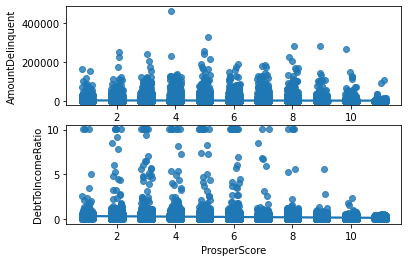

In [58]:
#checking for outliers in amountdelinquent
fig, axs = plt.subplots(2)
sb.regplot(ax = axs[0], y = df_loan_filtered['AmountDelinquent'], x = df_loan_filtered['ProsperScore'], x_jitter=0.2, fit_reg=True,)
sb.regplot(ax = axs[1],y = df_loan_filtered['DebtToIncomeRatio'], x = df_loan_filtered['ProsperScore'], x_jitter=0.2, fit_reg=True,)
#outlier?? above Q3+1,5 times half

(0.0, 2.0)

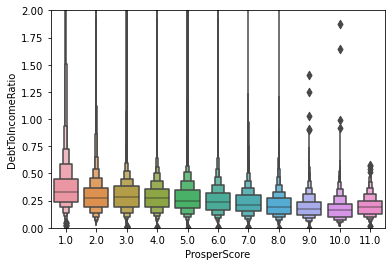

In [62]:
sb.boxenplot(data = df_loan_filtered, y = 'DebtToIncomeRatio', x = 'ProsperScore')
plt.ylim(0,2)

<AxesSubplot:xlabel='ProsperRating (Alpha)', ylabel='AmountDelinquent'>

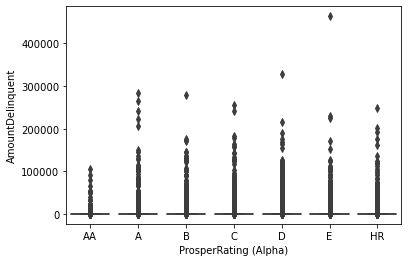

In [19]:
#checking for outliers in the amount delinquent
sb.boxplot(data = df_loan_filtered, x = 'ProsperRating (Alpha)', y = 'AmountDelinquent')

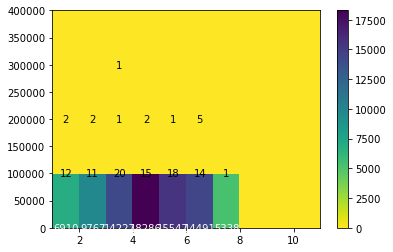

In [20]:
#Trying to get a better picture of AmountDelinquent
bins_y = np.arange(0,df_loan_filtered['AmountDelinquent'].max() +1000, 100000)
bins_x = ([1,2,3,4,5,6,7,8,9,10,11])
h2d= plt.hist2d(data= df_loan_filtered, x = 'ProsperRating (numeric)', y = 'AmountDelinquent', bins =[bins_x,bins_y], cmap ='viridis_r')
counts = h2d[0]
plt.colorbar()
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

Here we see that the amount of listings by people with an amount delinquent is very low, a scaled axis is needed to visualise this. Below we can see that further analysis might require a new category: a True or False for Amount delinquent

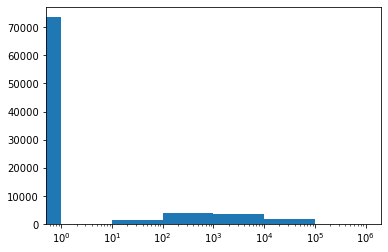

In [21]:
plt.hist(x = df_loan_filtered['AmountDelinquent'], bins=[0,1,5,10,100,1000,10000,100000,1000000])
plt.xscale('log')

Seeing the amount of outliers, it becomes clear that the numerical value of `AmountDelinquent` is not neccesary for the analyis. **If** someone is delinquent might be. So let's convert this variable into a categorical. `DebtToIncomeRatio` might be numerically interesting. Plots do need to be axis-limited for viewability. 

In [22]:
#creating a new category for AmountDelinquent
#conditions for new categories
conditions = [
    (df_loan_filtered['AmountDelinquent'] == 0),
    (df_loan_filtered['AmountDelinquent'] >0) & (df_loan_filtered['AmountDelinquent'] <=100),
    (df_loan_filtered['AmountDelinquent'] > 100),
    (df_loan_filtered['AmountDelinquent'].isnull())
]
#names for categories
values = ['None', 'Small','Large','Unknown' ]
#populate new column
df_loan_filtered['HasDelinquency'] = np.select(conditions,values)

In [23]:
#check for results
df_loan_filtered.HasDelinquency.value_counts()

None     73681
Large     9476
Small     1515
Name: HasDelinquency, dtype: int64

In [24]:
#make hasdelinquency a category
df_loan_filtered['HasDelinquency'] = df_loan_filtered.HasDelinquency.astype('category')

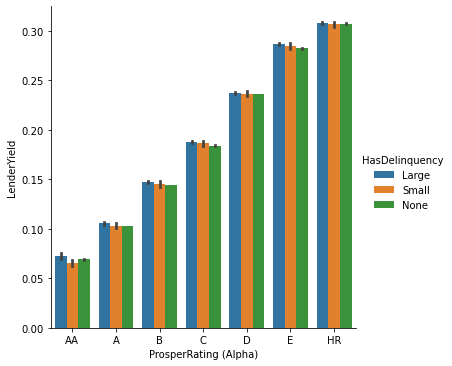

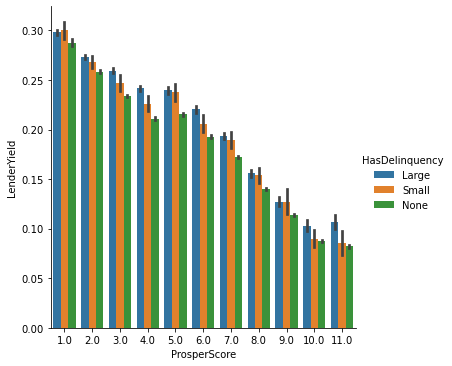

In [25]:
sb.catplot(data = df_loan_filtered, x = 'ProsperRating (Alpha)', y = 'LenderYield', hue = 'HasDelinquency',  kind = 'bar', hue_order = ['Large','Small','None']),
sb.catplot(data = df_loan_filtered, x = 'ProsperScore', y = 'LenderYield', hue = 'HasDelinquency',  kind = 'bar', hue_order = ['Large','Small','None'])

We can see that there is indeed a difference between the `LenderYields` for listings with Large, Small or No delinquencie amounts. As might be expected,the yields are smaller as the delinquencies are also smaller. Except for listings with a ProsperScore of 1.0 where small delinquencies have a higher yield than large ones.



### Groups

In [13]:
#number of groups in dataset
df_loan_filtered.GroupKey.nunique()

217

<AxesSubplot:xlabel='CurrentlyInGroup', ylabel='BorrowerRate'>

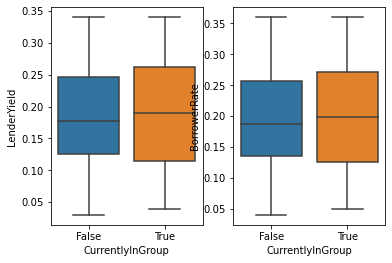

In [14]:
#does membership of a group result in different yields and rates
fig, axs = plt.subplots(1,2)
sb.boxplot(ax = axs[0],data = df_loan_filtered, x = 'CurrentlyInGroup', y='LenderYield')
sb.boxplot(ax = axs[1],data = df_loan_filtered, x = 'CurrentlyInGroup', y='BorrowerRate')

<AxesSubplot:xlabel='GroupKey', ylabel='BorrowerRate'>

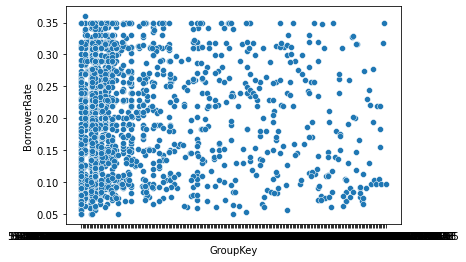

In [15]:
#Differences in BorrowerRate between Groups
sb.scatterplot(data = df_loan_filtered, x = df_loan_filtered['GroupKey'], y = 'BorrowerRate')

There doesn't seem to be a difference in `BorrowerRate` between groups. making the main difference whether or not a person belongs to a group.

## Estimated Loss

<AxesSubplot:xlabel='ProsperRating (numeric)', ylabel='EstimatedLoss'>

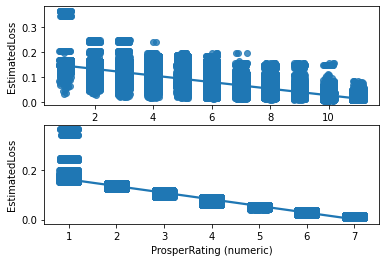

In [26]:
fig, axs= plt.subplots(2)
sb.regplot(ax=axs[0],y = df_loan_filtered['EstimatedLoss'], x = df_loan_filtered['ProsperScore'], x_jitter=0.2, fit_reg=True)
sb.regplot(ax=axs[1],y = df_loan_filtered['EstimatedLoss'], x = df_loan_filtered['ProsperRating (numeric)'], x_jitter=0.2, fit_reg=True)

<AxesSubplot:xlabel='ProsperScore', ylabel='EstimatedLoss'>

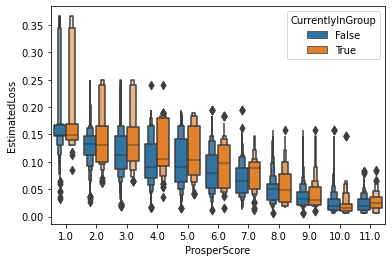

In [27]:
sb.boxenplot(data = df_loan_filtered, y = 'EstimatedLoss', x = 'ProsperScore', hue = 'CurrentlyInGroup')
#outliers?

<AxesSubplot:xlabel='ProsperScore', ylabel='EstimatedLoss'>

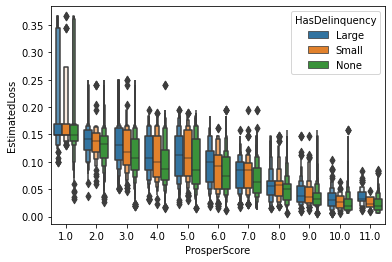

In [28]:
sb.boxenplot(data = df_loan_filtered, y = 'EstimatedLoss', x = 'ProsperScore', hue = 'HasDelinquency', hue_order =['Large', 'Small','None'])

In [29]:
import statsmodels.api as sm
mod = sm.OLS(df_loan_filtered['AmountDelinquent'],df_loan_filtered['ProsperScore'])
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:       AmountDelinquent   R-squared (uncentered):                   0.011
Model:                            OLS   Adj. R-squared (uncentered):              0.011
Method:                 Least Squares   F-statistic:                              906.1
Date:                Thu, 04 Feb 2021   Prob (F-statistic):                   5.28e-198
Time:                        15:42:35   Log-Likelihood:                     -8.7506e+05
No. Observations:               84672   AIC:                                  1.750e+06
Df Residuals:                   84671   BIC:                                  1.750e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

There is a correlation between ProsperSCore and amount delinquent. But is is not a linear regression

## Loan status

The loan status might give a prediction on 

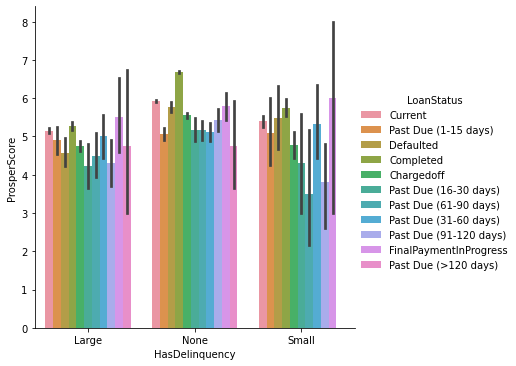

In [30]:
# Loan status vs Prosper Rating
sb.catplot(data= df_loan_filtered, y='ProsperScore', x = 'HasDelinquency', hue='LoanStatus', kind = 'bar')

We need some new categories..
1. Nominal
2. Problematic

In [31]:
#creating a new category for LoanStatus
#conditions for new categories
conditions = [
    (df_loan_filtered['LoanStatus'] == 'Current')|(df_loan_filtered['LoanStatus'] =='Completed') | (df_loan_filtered['LoanStatus'] == 'FinalPaymentInProgress'),
    (df_loan_filtered['LoanStatus'] == 'Defaulted') | (df_loan_filtered['LoanStatus'] == 'Chargedoff')|(df_loan_filtered['LoanStatus'].str.contains("Past Due"))
]
#names for categories
values = ['Nominal','Problematic' ]
#populate new column
df_loan_filtered['Loan_Result'] = np.select(conditions,values)

In [71]:
df_loan_filtered.Loan_Result.value_counts()

Nominal        76282
Problematic     8390
Name: Loan_Result, dtype: int64

In [70]:
df_loan_filtered['Loan_Result'] = df_loan_filtered.Loan_Result.astype('category')

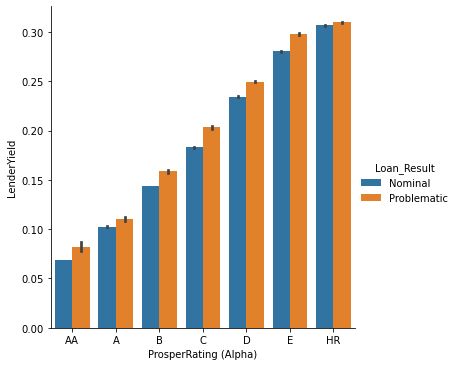

In [63]:
sb.catplot(data= df_loan_filtered, y='LenderYield', x = 'ProsperRating (Alpha)', hue='Loan_Result', kind = 'bar')

Impact of HR rating filtered out


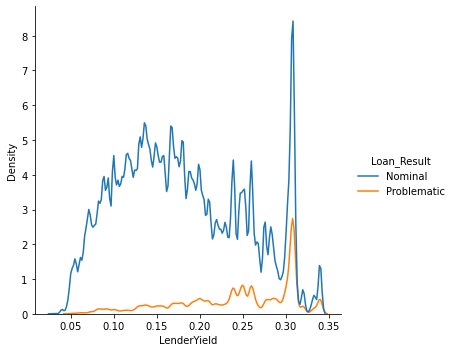

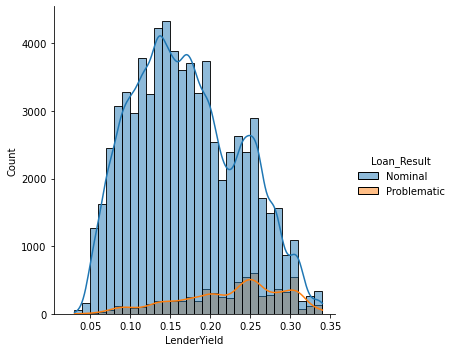

In [94]:
sb.displot(data = df_loan_filtered, x = 'LenderYield', hue = 'Loan_Result', kind = 'kde', bw_adjust = 0.25)
#filter out HR rated listings\
print('Impact of HR rating filtered out')
sb.displot(data = df_loan_filtered[df_loan_filtered['ProsperRating (Alpha)']!='HR'], x = 'LenderYield',bins= bins, kde= True, hue= 'Loan_Result')

The amount of problematic listings increases as the Yield increases, however there are a few interesting spikes

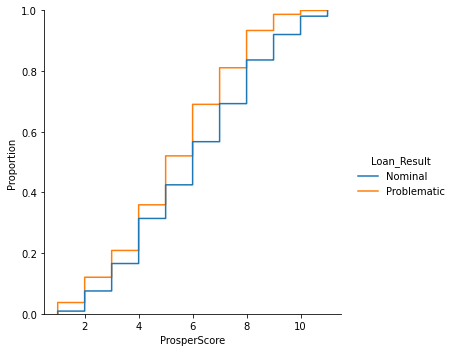

In [95]:
sb.displot(data = df_loan_filtered, x = 'ProsperScore', hue = 'Loan_Result', kind = 'ecdf')

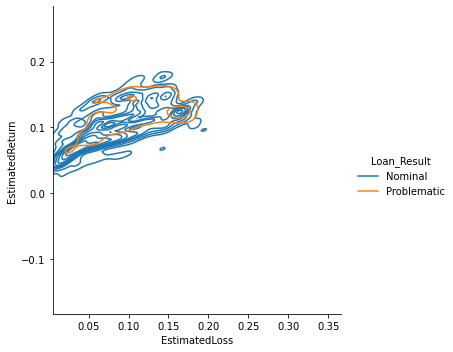

In [97]:
sb.displot(data = df_loan_filtered, x = 'EstimatedLoss', y= 'EstimatedReturn', kind = 'kde', hue = 'Loan_Result'b)

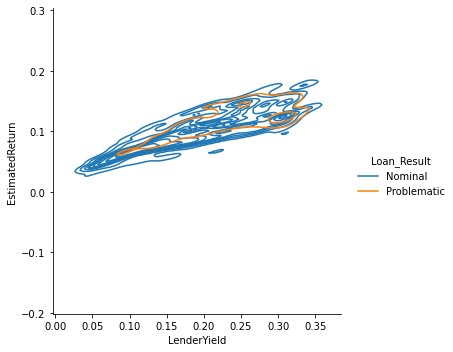

In [98]:
sb.displot(data = df_loan_filtered, x = 'LenderYield', y= 'EstimatedReturn', kind = 'kde', hue = 'Loan_Result')

## Estimated Loss
## Development of Analysis
The initial viewing of the data has given some interesting insights. There are several rating systems to determine the risk involved with a listing
1. ProsperRating
2. ProsperScore
One obvious question to ask is, is there a difference between the two in terms of categorising risk. Initial plots show differences in slope of correlation with Estimated loss, and Lender Yield. Also differences in grouping upon estimated loss

secondly there when looking at possible indicators of succes for the listing, the Loan status and Estimated Loss are two that require scrutiny. Are the rating systems correlated with these two indicators, and are there other factors involved? 

Lastly, Test several combinations of indicators, with the succes factors above. 
listing category
group membership
rating / score

